# interpolation

In [164]:
import pandas as pd
import numpy as np

,value
time,
2012-01-01 00:00:00,5
2012-01-01 00:01:00,6
2012-01-01 00:02:00,3
2012-01-01 00:03:00,4
2012-01-01 00:09:00,6
2012-01-01 00:19:00,8
2012-01-01 00:26:00,5
2012-01-01 00:27:00,4
2012-01-01 00:28:00,6


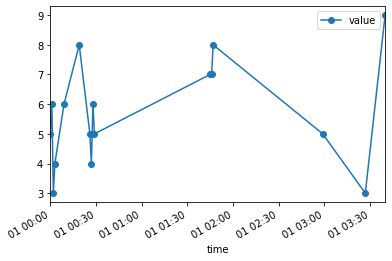

In [182]:
data = [
    ("2012-01-01 00:00:00", 5),
    ("2012-01-01 00:01:00", 6),
    ("2012-01-01 00:02:00", 3),    
    ("2012-01-01 00:03:00", 4),
    ("2012-01-01 00:09:00", 6),
    ("2012-01-01 00:19:00", 8),
    ("2012-01-01 00:26:00", 5),    
    ("2012-01-01 00:27:00", 4),
    ("2012-01-01 00:28:00", 6),
    ("2012-01-01 00:29:00", 5),
    ("2012-01-01 01:45:00", 7),
    ("2012-01-01 01:46:00", 7),
    ("2012-01-01 01:47:00", 8),    
    ("2012-01-01 02:59:00", 5),
    ("2012-01-01 03:27:00", 3),
    ("2012-01-01 03:40:00", 9),    
]

df = pd.DataFrame(data, columns=["time", "value"])
df["time"] = pd.to_datetime(df["time"])
df = df.set_index('time')

df.plot(y='value', marker="o", kind='line')

df

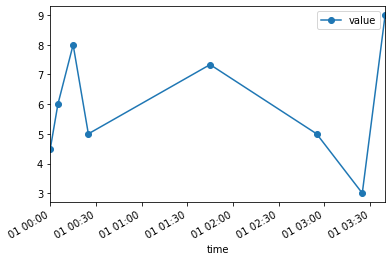

In [186]:
df.resample("5min").mean().dropna().plot(y='value', marker="o", kind='line')

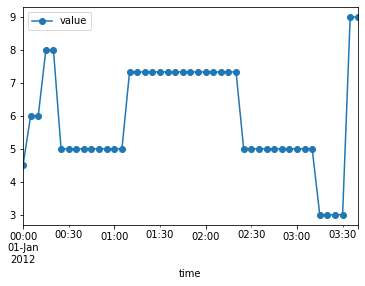

In [181]:
df_resample = df.resample("5min").mean()
df_resample.interpolate('nearest').plot(y='value', marker="o", kind='line')

In [ ]:
df_resample.interpolate('spline', order=4).plot(y='value', marker="o", kind='line')

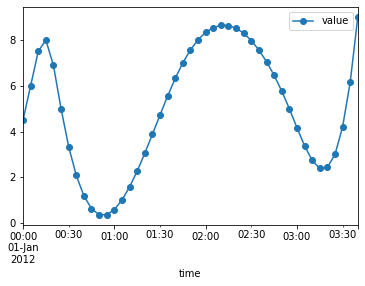

In [177]:
df_resample.interpolate('polynomial', order=3).plot(y='value', marker="o", kind='line')

In [ ]:
'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline',
      'barycentric', 'polynomial'

$\underbrace{h(t | x)}_{\text{hazard}} = \overbrace{b_0(t)}^{\text{baseline hazard}} \underbrace{\exp \overbrace{\left(\sum_{i=1}^n b_i (x_i - \overline{x_i})\right)}^{\text{log-partial hazard}}}_ {\text{partial hazard}}$

$\exp(-0.43) = \frac{\text{hazard of married subjects at time $t$}}{\text{hazard of unmarried subjects at time $t$}}$

# proportional assumption

In [37]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.print_summary()  # access the results using cph.summary

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2019-10-23 06:25:38 UTC

---
       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
fin   -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age   -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race   0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp  -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar   -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro  -0.08       

In [38]:
X = rossi_dataset

In [39]:
cph.predict_partial_hazard(X)

,0
0,1.219126
1,3.230250
2,3.031058
3,0.487712
4,1.214025
5,1.238655
6,0.579853
7,1.110755
8,2.327246
9,1.297946


In [40]:
cph.predict_survival_function(X)

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
T,,,,,,,,,,,,,,,,,,,,,
1.0,0.997616,0.993695,0.994083,0.999045,0.997626,0.997578,0.998865,0.997827,0.995453,0.997462,...,0.997826,0.996005,0.996031,0.997774,0.998892,0.999184,0.997033,0.998866,0.998170,0.998610
2.0,0.995230,0.987411,0.988183,0.998089,0.995250,0.995154,0.997728,0.995653,0.990914,0.994922,...,0.995649,0.992014,0.992067,0.995547,0.997782,0.998366,0.994065,0.997730,0.996337,0.997217
3.0,0.992848,0.981162,0.982314,0.997133,0.992878,0.992734,0.996592,0.993482,0.986392,0.992388,...,0.993476,0.988037,0.988115,0.993324,0.996673,0.997548,0.991105,0.996595,0.994507,0.995826
4.0,0.990468,0.974941,0.976468,0.996176,0.990507,0.990316,0.995455,0.991311,0.981882,0.989855,...,0.991304,0.984067,0.984171,0.991100,0.995563,0.996729,0.988147,0.995458,0.992676,0.994433
5.0,0.988085,0.968739,0.970639,0.995216,0.988135,0.987895,0.994315,0.989139,0.977378,0.987320,...,0.989129,0.980101,0.980231,0.988875,0.994450,0.995909,0.985189,0.994319,0.990843,0.993039
6.0,0.985699,0.962552,0.964820,0.994254,0.985758,0.985471,0.993172,0.986961,0.972877,0.984781,...,0.986950,0.976134,0.976290,0.986645,0.993334,0.995085,0.982227,0.993177,0.989006,0.991640
7.0,0.983305,0.956370,0.959004,0.993287,0.983374,0.983039,0.992024,0.984777,0.968371,0.982235,...,0.984764,0.972162,0.972343,0.984409,0.992213,0.994258,0.979258,0.992030,0.987162,0.990236
8.0,0.971402,0.926001,0.930402,0.988460,0.971520,0.970950,0.986294,0.973910,0.946118,0.969581,...,0.973888,0.952510,0.952816,0.973282,0.986619,0.990125,0.964523,0.986304,0.977978,0.983232
9.0,0.966614,0.913958,0.919043,0.986508,0.966752,0.966089,0.983979,0.969536,0.937236,0.964495,...,0.969510,0.944651,0.945006,0.968804,0.984358,0.988453,0.958609,0.983991,0.974277,0.980405


In [41]:
cph.predict_median(X)

,0.5
0,inf
1,44.0
2,46.0
3,inf
4,inf
5,inf
6,inf
7,inf
8,inf
9,inf


$\begin{split}\begin{align*}
P(T > t \;|\; T > s) &= \frac{P(T > t \;\text{and}\; T > s)}{P(T > s)} \\
                     &= \frac{P(T > t)}{P(T > s)} \\
                     &= \frac{S(t)}{S(s)}
\end{align*}\end{split}$

In [42]:
censored_subjects = X.loc[~X['arrest'].astype(bool)]
censored_subjects_last_obs = censored_subjects['week']

cph.predict_survival_function(censored_subjects, times=[5., 25., 50.], conditional_after=censored_subjects_last_obs)

,3,4,5,7,8,9,10,11,13,17,...,413,419,420,423,425,427,428,429,430,431
5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
